# Training the custom UNet and visualizing the results

Most of the funcitons to plot and create the training data is taken from: https://www.kaggle.com/paultimothymooney/identification-and-segmentation-of-nuclei-in-cells/notebook


In [13]:
from UNet_Functional import unet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import tensorflow as tf
import keras
import random

In [2]:
x_train = np.load('./data/x_train.npy')
y_train = np.load('./data/y_train.npy')
x_test = np.load('./data/x_test.npy')
y_test = np.load('./data/y_test.npy')

In [3]:
model = unet(inputs_shape=(128, 128, 3), num_classes=1)

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 1792        lambda[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 36928       conv2d[0][0]                     
______________________________________________________________________________________________

In [5]:
train_data = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)
).shuffle(536).batch(8).prefetch(tf.data.AUTOTUNE).cache()

val_data = tf.data.Dataset.from_tensor_slices(
    (x_test, y_test)
).shuffle(134).batch(8).prefetch(tf.data.AUTOTUNE).cache()

In [6]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [7]:
histroy = model.fit(train_data, validation_data=val_data, epochs=5)

Epoch 1/5
67/67 [==============================] - 39s 413ms/step - loss: 0.4640 - accuracy: 0.7834 - val_loss: 0.2844 - val_accuracy: 0.8384
Epoch 2/5
67/67 [==============================] - 24s 358ms/step - loss: 0.2529 - accuracy: 0.8913 - val_loss: 0.1739 - val_accuracy: 0.9290
Epoch 3/5
67/67 [==============================] - 24s 359ms/step - loss: 0.1570 - accuracy: 0.9394 - val_loss: 0.1300 - val_accuracy: 0.9529
Epoch 4/5
67/67 [==============================] - 24s 359ms/step - loss: 0.1302 - accuracy: 0.9518 - val_loss: 0.1096 - val_accuracy: 0.9579
Epoch 5/5
67/67 [==============================] - 24s 360ms/step - loss: 0.1125 - accuracy: 0.9581 - val_loss: 0.1169 - val_accuracy: 0.9590


5/5 [==============================] - 1s 262ms/step


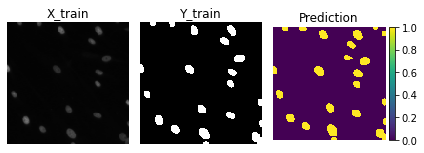

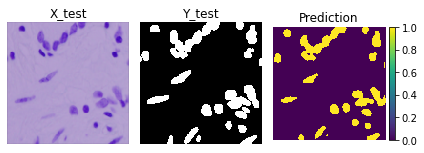

In [14]:
def plotPredictions(a,b,c,d,e):
    model = e
    # Threshold predictions
    preds_train = model.predict(a[:int(a.shape[0]*0.9)], verbose=1)
    preds_val = model.predict(a[int(a.shape[0]*0.9):], verbose=1)
    preds_test = model.predict(c, verbose=1)
    preds_train_t = (preds_train > 0.5).astype(np.uint8)
    preds_val_t = (preds_val > 0.5).astype(np.uint8)
    preds_test_t = (preds_test > 0.5).astype(np.uint8)
    # Perform a sanity check on some random training samples
    ix = random.randint(0, len(preds_train_t))
    plt.subplot(1,3,1)
    plt.title("X_train")
    plt.axis('off')
    imshow(a[ix])
    plt.subplot(1,3,2)
    plt.title("Y_train")
    plt.axis('off')
    imshow(np.squeeze(b[ix]))
    plt.subplot(1,3,3)
    plt.title("Prediction")
    plt.axis('off')
    imshow(np.squeeze(preds_train_t[ix]))
    plt.show()
    # Perform a sanity check on some random validation samples
    ix = random.randint(0, len(preds_val_t))
    plt.subplot(1,3,1)
    plt.title("X_test")
    plt.axis('off')
    imshow(a[int(a.shape[0]*0.9):][ix])
    plt.subplot(1,3,2)
    plt.title("Y_test")
    plt.axis('off')
    imshow(np.squeeze(b[int(b.shape[0]*0.9):][ix]))
    plt.subplot(1,3,3)
    plt.title("Prediction")
    plt.axis('off')
    imshow(np.squeeze(preds_val_t[ix]))
    plt.show()
plotPredictions(x_train,y_train,x_test,y_test,model)

# Conclusion

The perfromance is very good using our UNet